# Wstęp do szeregów czasowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

## Zadanie 1
Wczytaj dane `a10.csv` opisujący miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj *wykres sezonowy*, tzn. wykres wartości szeregu z podziałem na lata i miesiące,
- narysuj wykresy skrzynkowe z podziałem na lata i miesiące,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [4]:
#funkcja do plotowania szeregów czasowych
def plot_time_series(t, val, title="", xlabel='Data', ylabel='Wartość', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(t, val, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [5]:
a10 = pd.read_csv('a10.csv', 
                 parse_dates=['date'], index_col='date')
#data to indeksy ramki danych, wartości w kolumnie

In [6]:
a10

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [7]:
a10.values

array([[ 3.526591  ],
       [ 3.180891  ],
       [ 3.252221  ],
       [ 3.611003  ],
       [ 3.565869  ],
       [ 4.306371  ],
       [ 5.088335  ],
       [ 2.81452   ],
       [ 2.985811  ],
       [ 3.20478   ],
       [ 3.127578  ],
       [ 3.270523  ],
       [ 3.73785082],
       [ 3.55877609],
       [ 3.77720173],
       [ 3.92449042],
       [ 4.38653092],
       [ 5.81054917],
       [ 6.19206769],
       [ 3.45085699],
       [ 3.77230686],
       [ 3.7343029 ],
       [ 3.90539892],
       [ 4.04968714],
       [ 4.31556552],
       [ 4.56218455],
       [ 4.60866203],
       [ 4.66785129],
       [ 5.09384145],
       [ 7.1799622 ],
       [ 6.73147308],
       [ 3.84127758],
       [ 4.39407557],
       [ 4.07534073],
       [ 4.5406449 ],
       [ 4.64561508],
       [ 4.75260653],
       [ 5.35060467],
       [ 5.20445484],
       [ 5.3016513 ],
       [ 5.77374216],
       [ 6.20459348],
       [ 6.74948382],
       [ 4.21606735],
       [ 4.94934946],
       [ 4

In [8]:
a10.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

### Wykres wartości szeregu w zależności od czasu

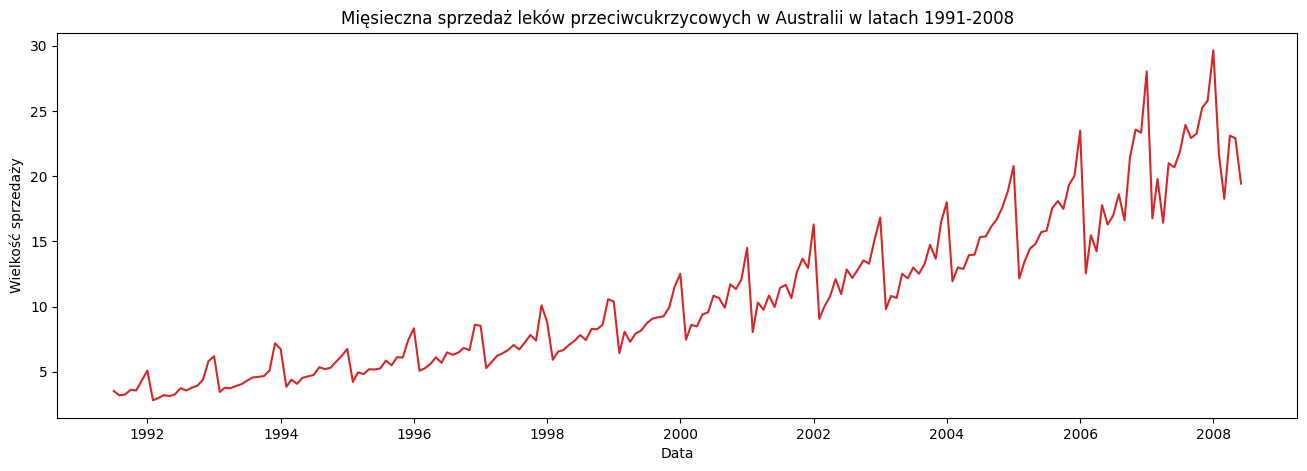

In [11]:
plot_time_series(t=a10.index, val=a10.value, 
                 title='Mięsieczna sprzedaż leków przeciwcukrzycowych w Australii w latach 1991-2008',
                ylabel='Wielkość sprzedaży')
# sezonowosc i trend wzrostowy

### Wykres sezonowy

In [12]:
a10_series = a10.value
a10_series = a10_series.loc[(a10_series.index >= '1992-01-01') & (a10_series.index < '2008-01-01')] #skracamy do lat gdzie mamy dane dla wszystkich miesięcy
a10_series

date
1992-01-01     5.088335
1992-02-01     2.814520
1992-03-01     2.985811
1992-04-01     3.204780
1992-05-01     3.127578
                ...    
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
Name: value, Length: 192, dtype: float64

In [13]:
from pandas import Grouper

In [14]:
groups = a10_series.groupby(Grouper(freq = 'Y')) # będziemy wykonywać operacje na danych pogrupowanych dane z każdego roku to jedna grupa

In [15]:
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
    
years

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,5.088335,6.192068,6.731473,6.749484,8.329452,8.524471,8.798513,10.391416,12.511462,14.497581,16.300269,16.828350,18.003768,20.778723,23.486694,28.038383
1,2.814520,3.450857,3.841278,4.216067,5.069796,5.277918,5.918261,6.421535,7.457199,8.049275,9.053485,9.800215,11.938030,12.154552,12.536987,16.763869
2,2.985811,3.772307,4.394076,4.949349,5.262557,5.714303,6.534493,8.062619,8.591191,10.312891,10.002449,10.816994,12.997900,13.402392,15.467018,19.792754
3,3.204780,3.734303,4.075341,4.823045,5.597126,6.214529,6.675736,7.297739,8.474000,9.753358,10.788750,10.654223,12.882645,14.459239,14.233539,16.427305
4,3.127578,3.905399,4.540645,5.194754,6.110296,6.411929,7.064201,7.936916,9.386803,10.850382,12.106705,12.512323,13.943447,14.795102,17.783058,21.000742
5,3.270523,4.049687,4.645615,5.170787,5.689161,6.667716,7.383381,8.165323,9.560399,9.961719,10.954101,12.161210,13.989472,15.705248,16.291602,20.681002
6,3.737851,4.315566,4.752607,5.256742,6.486849,7.050831,7.813496,8.717420,10.834295,11.443601,12.844566,12.998046,15.339097,15.829550,16.980282,21.834890
7,3.558776,4.562185,5.350605,5.855277,6.300569,6.704919,7.431892,9.070964,10.643751,11.659239,12.196500,12.517276,15.370764,17.554701,18.612189,23.930204
8,3.777202,4.608662,5.204455,5.490729,6.467476,7.250988,8.275117,9.177113,9.908162,10.647060,12.854748,13.268658,16.142005,18.100864,16.623343,22.930357
9,3.924490,4.667851,5.301651,6.115293,6.828629,7.819733,8.260441,9.251887,11.710041,12.652134,13.542004,14.733622,16.685754,17.496668,21.430241,23.263340


<Axes: >

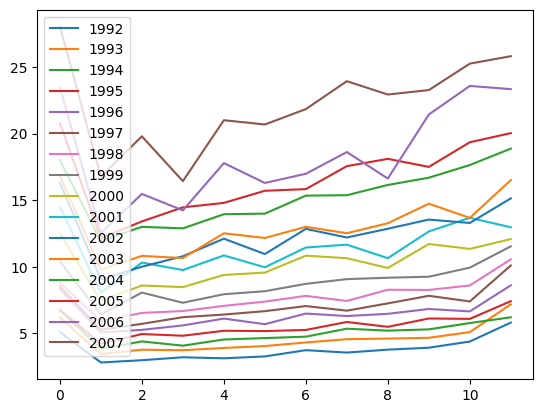

In [16]:
years.plot()
#widzimy sezonowość (dla każdego roku najpierw opada, później stopniowo się podnosi)
#widzimy trend (wartości dla każdego kolejnego roku średnio coraz wyżej)

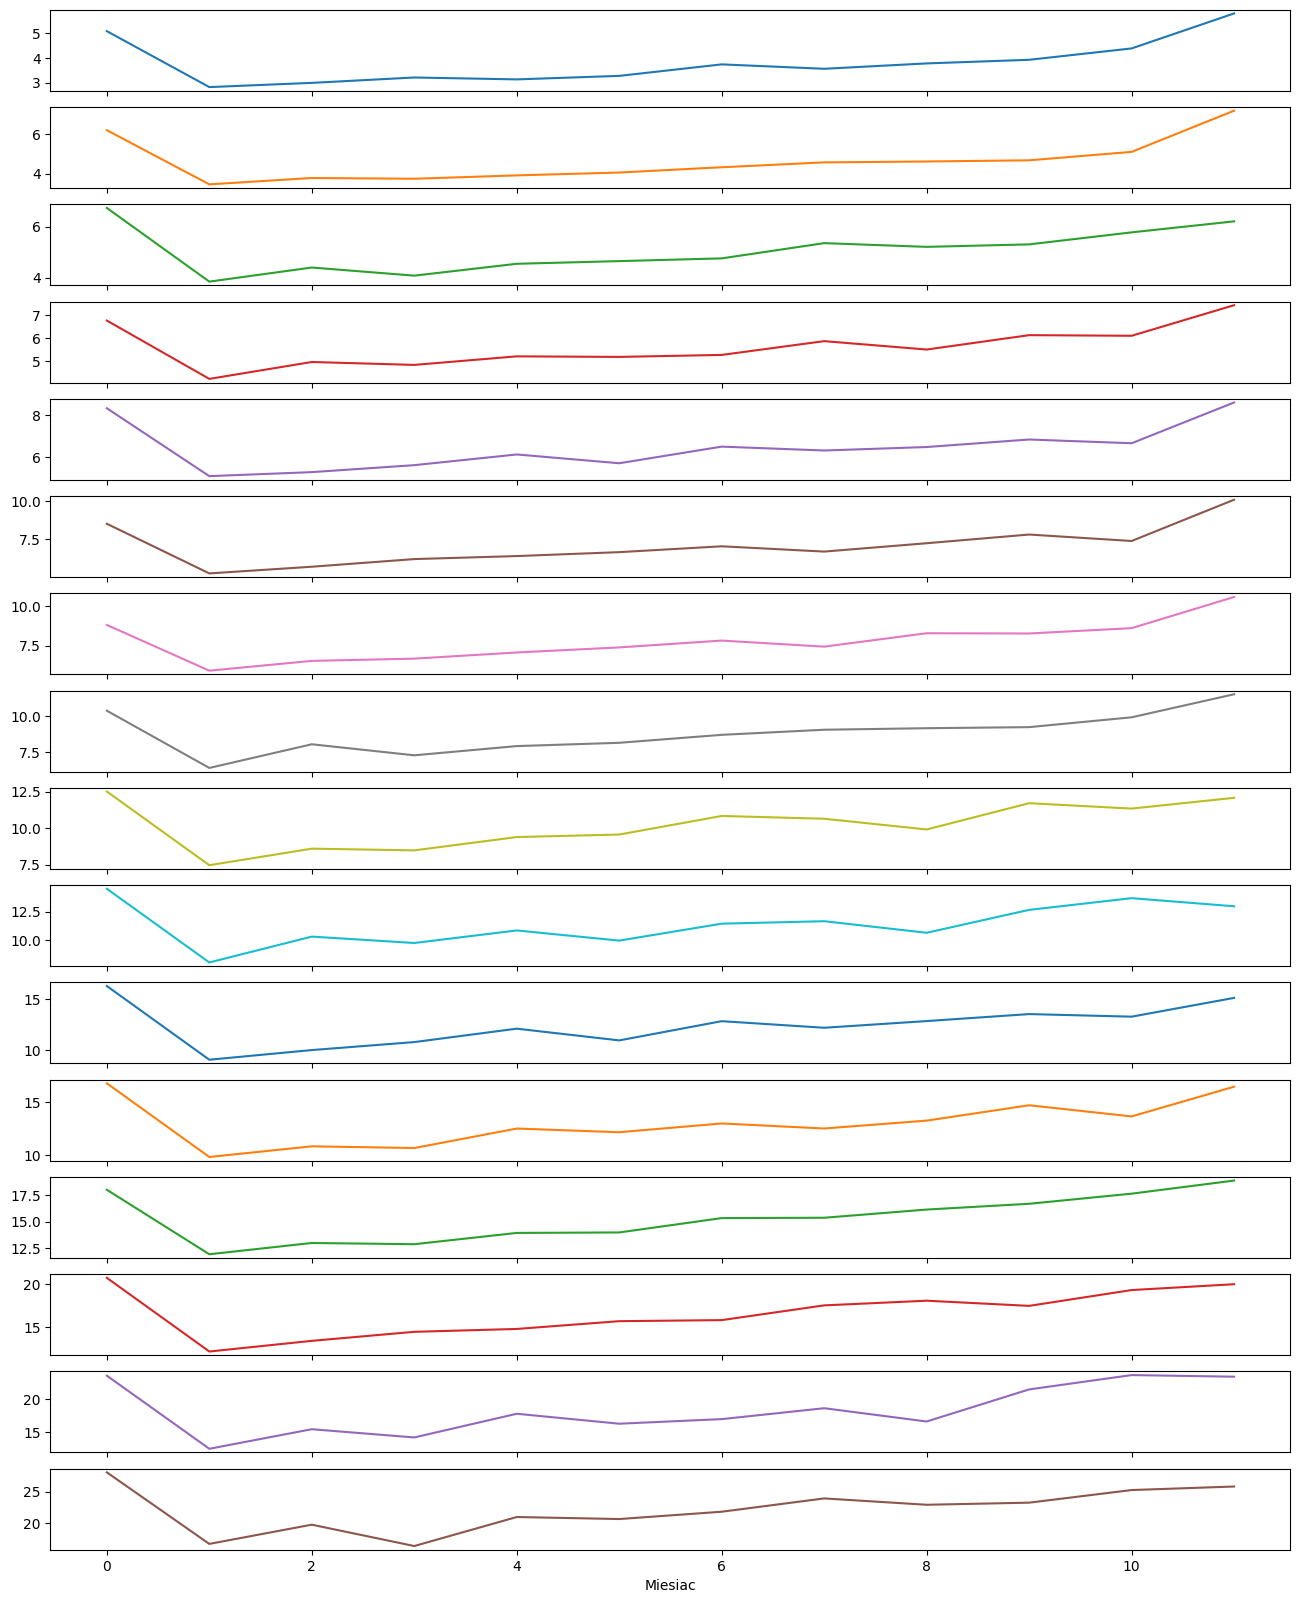

In [17]:
years.plot(subplots=True, legend=False, figsize=(16, 20))
plt.gca().set(xlabel='Miesiac')
plt.show()
#tutaj na oddzielnych wykresach

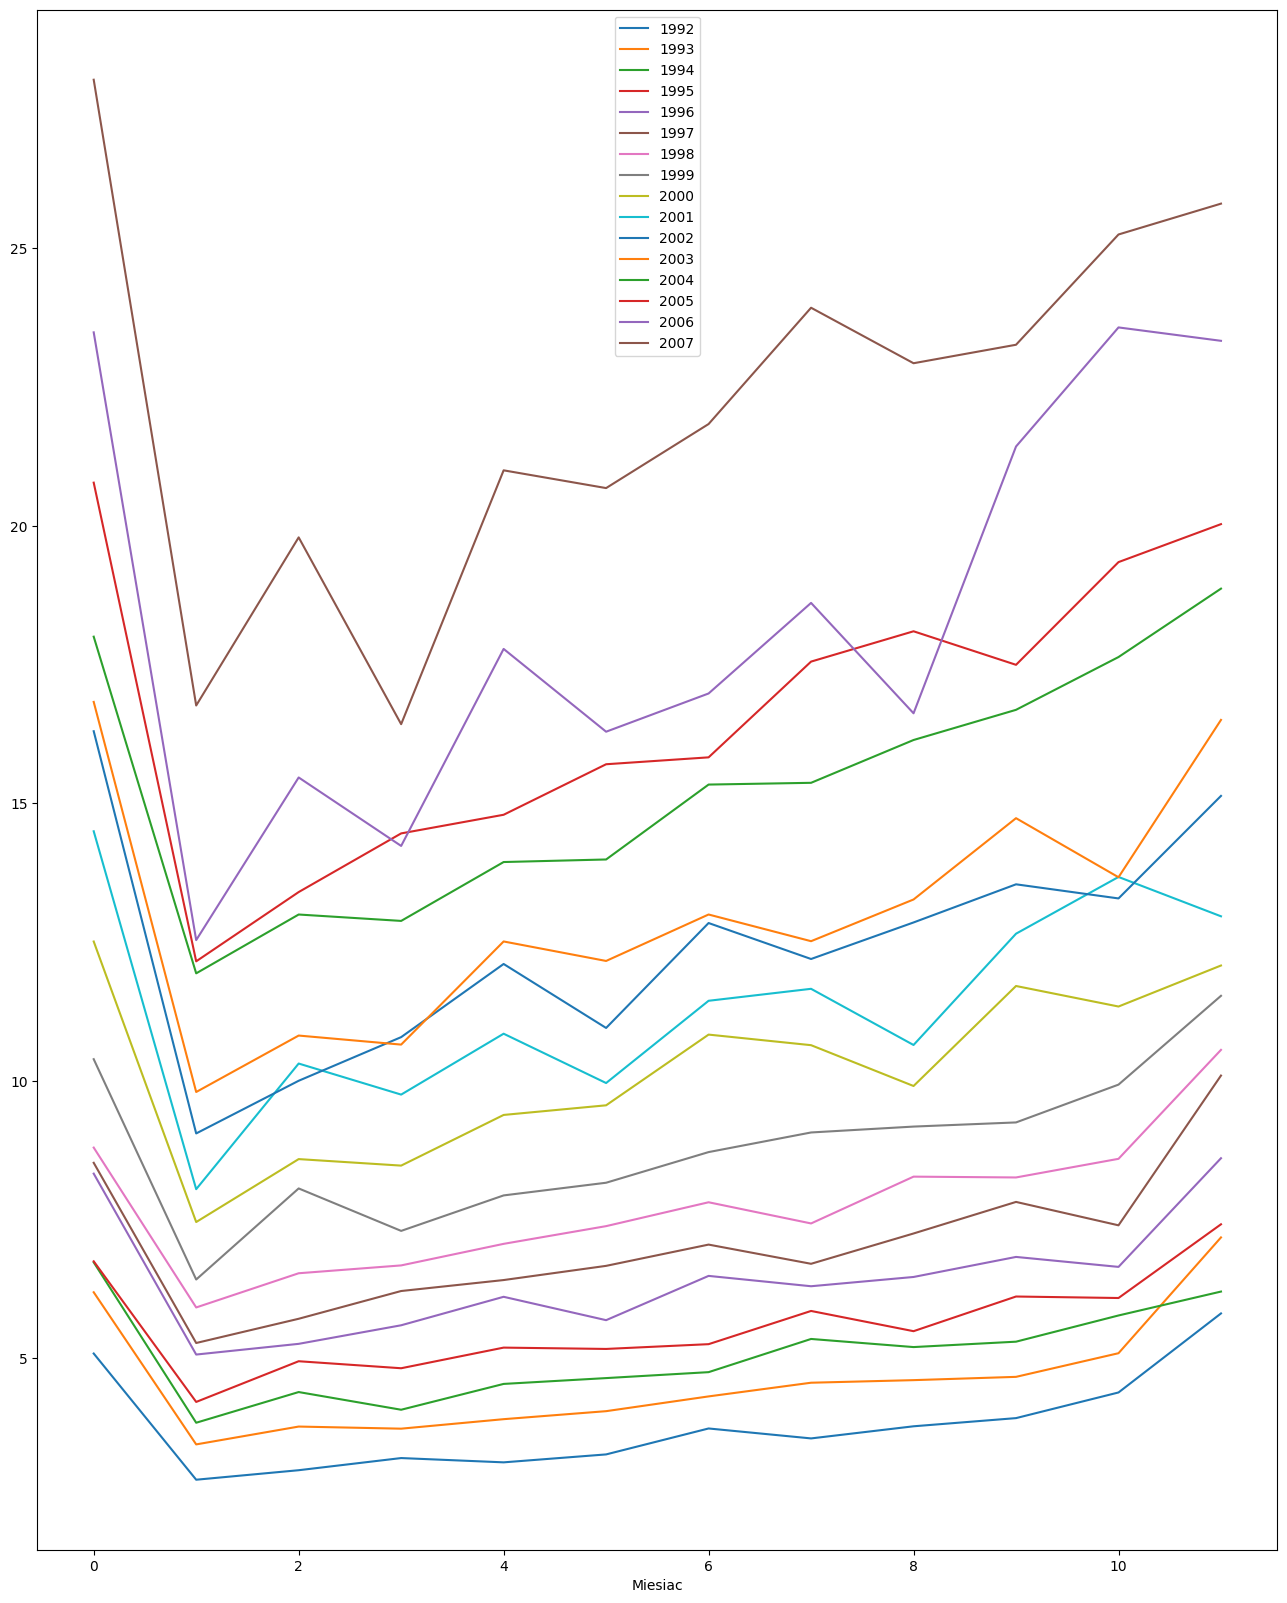

In [18]:
#powiększony wcześniejszy wykres
years.plot(subplots=False, legend=True, figsize=(16, 20))
plt.gca().set(xlabel='Miesiac')
plt.show()

### Wykresy skrzynkowe

- roczne (trend)
- miesięczne (sezonowość)

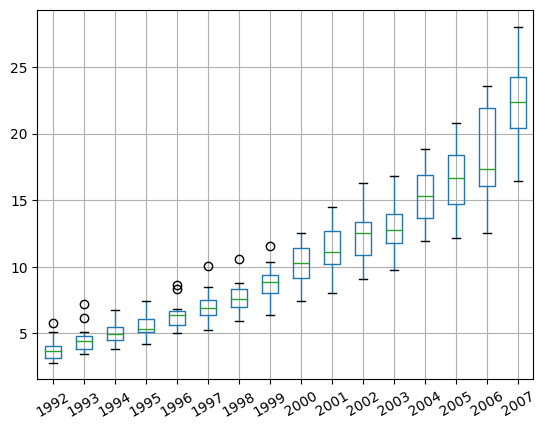

In [19]:
years.boxplot()
plt.xticks(rotation=30)
plt.show()
#zdecydowanie widoczny trend dla skrzynek

In [20]:
months = years.T
months

,0,1,2,3,4,5,6,7,8,9,10,11
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598
1996,8.329452,5.069796,5.262557,5.597126,6.110296,5.689161,6.486849,6.300569,6.467476,6.828629,6.649078,8.606937
1997,8.524471,5.277918,5.714303,6.214529,6.411929,6.667716,7.050831,6.704919,7.250988,7.819733,7.398101,10.096233
1998,8.798513,5.918261,6.534493,6.675736,7.064201,7.383381,7.813496,7.431892,8.275117,8.260441,8.596156,10.558939
1999,10.391416,6.421535,8.062619,7.297739,7.936916,8.165323,8.717420,9.070964,9.177113,9.251887,9.933136,11.532974
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132
2001,14.497581,8.049275,10.312891,9.753358,10.850382,9.961719,11.443601,11.659239,10.647060,12.652134,13.674466,12.965735


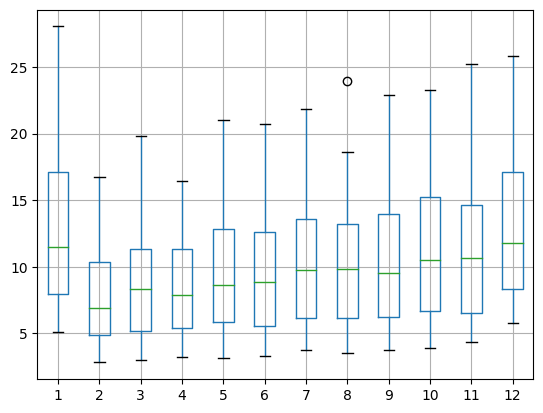

In [21]:
months.boxplot()
plt.xticks(ticks=np.arange(1, 13), labels=np.arange(1, 13))
plt.show()
#przebieg miesięczny, jest sezonowość (choć stąd może ciężko ją wyczytać)

In [22]:
#inna metoda tworzenia wykresów skrzynkowych
a10_series = pd.DataFrame(a10_series)
a10_series

,value
date,
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811
1992-04-01,3.204780
1992-05-01,3.127578
...,...
2007-08-01,23.930204
2007-09-01,22.930357
2007-10-01,23.263340


In [23]:
# dokładamy zmienną rok i miesiąć
a10_series['year'] = [d.year for d in a10_series.index]
a10_series['month'] = [d.strftime('%b') for d in a10_series.index]
a10_series

,value,year,month
date,,,
1992-01-01,5.088335,1992,Jan
1992-02-01,2.814520,1992,Feb
1992-03-01,2.985811,1992,Mar
1992-04-01,3.204780,1992,Apr
1992-05-01,3.127578,1992,May
...,...,...,...
2007-08-01,23.930204,2007,Aug
2007-09-01,22.930357,2007,Sep
2007-10-01,23.263340,2007,Oct


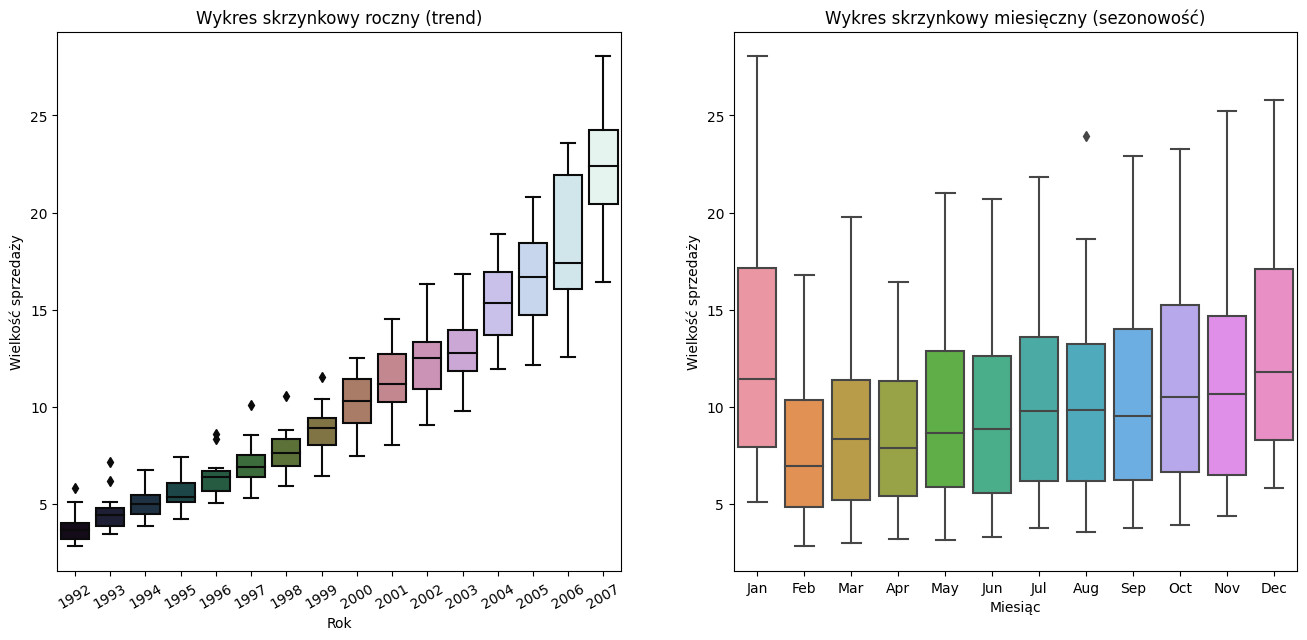

In [24]:
#wykresy skrzynkowe dla poszczególnych lat i miesięcy
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='year', y='value', data=a10_series, ax=axes[0], palette='cubehelix').set(
    xlabel='Rok',
    ylabel='Wielkość sprzedaży'
)

sns.boxplot(x='month', y='value', data=a10_series, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Wielkość sprzedaży'
)

axes[0].set_title('Wykres skrzynkowy roczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')
plt.show()

### Wykres autokorelacji

In [25]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

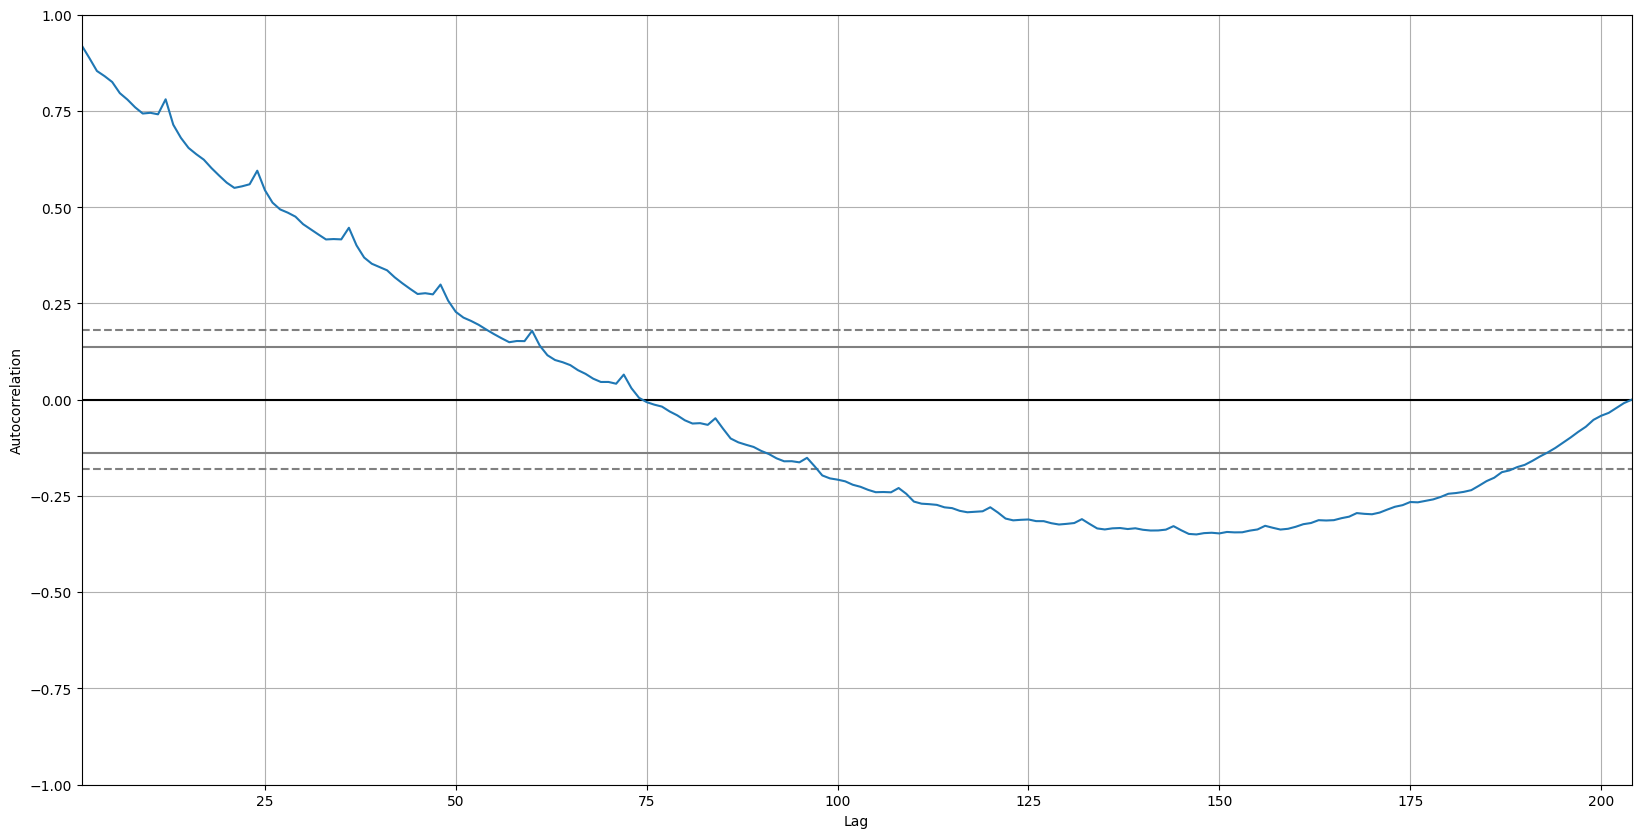

In [26]:
plt.figure(figsize=(20, 10))
autocorrelation_plot(a10.value.tolist())
#wykres autokorelacji bada zależności między poszczególnymi obserwacjami, pokazuje nam czy mamy szereg stacjonarny, czy mamy trend/sezonowość jeśli od pewnego momentu mieści się w pasie i nie oscyluje wóczas możemy mówić o stacjonarności
#jeśli cały czas jest w pasie to mamy biały szum
#tutaj ewidentnie nie mieści się w pasie nie mamy stacjonarności

## Zadanie 1a
Zaimplementuj własną funkcję do wyznaczenia autokorelacji dowolnego szeregu. 
Sporządź wykres jak powyżej.

**Przypomnienie**:

**Autokowariancja**
\begin{equation*}
    \hat{\gamma}(h) = \frac{1}{n} \sum_{i=1}^{n-h}(y_i - \overline{y})(y_{i+h} - \overline{y})
\end{equation*}

**Autokorelacja**
\begin{equation*}
    \text{ACF}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
\end{equation*}

In [27]:
#funkcja licząca gamma_z_daszkiem(h)
def Cov(y, h):
    n = len(y)
    y_mean = np.mean(y)
    cov = np.sum([(y[i] - y_mean) * (y[i+h] - y_mean) for i in range(n - h)])
    cov /= n
    return cov
#gamma_z_daszkiem(h)/gamma_z_daszkiem(0)
def ACF(y, h):
    acf_h = Cov(y, h) / Cov(y, 0)
    return acf_h
#wykres autokorelacji
def autocorrelation_plot2(series, lag=100, min_lag=1):
    h_range = range(min_lag, lag + 1)
    acf = [ACF(series, i) for i in h_range]
    
    plt.plot(h_range, acf)
    plt.hlines(xmin=min_lag, xmax=lag, y=0)
    #pas to kwantyl z rozkładu normalnego na poziomie 0.975 dzielone przez pierwiastek długości szeregu
    pufn = 1.96 / np.sqrt(len(series))
    plt.hlines(xmin=min_lag, xmax=lag, y=pufn,linestyles='dashed')
    plt.hlines(xmin=min_lag, xmax=lag, y=-pufn,linestyles='dashed')
    plt.xlim([min_lag, lag])
    plt.xlabel("Lag")
    plt.ylim([-1, 1])
    plt.ylabel("Autocorrelation")

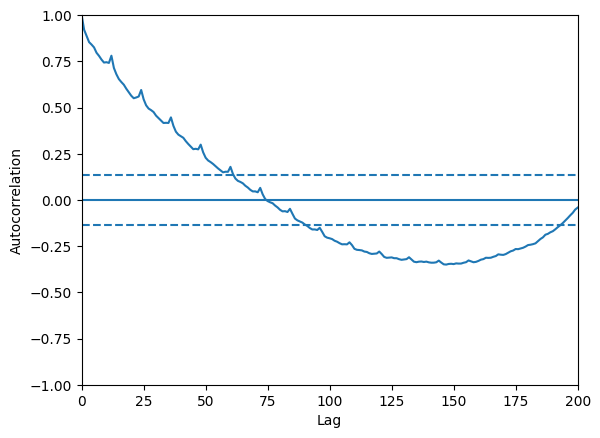

In [28]:
autocorrelation_plot2(a10.value.tolist(), lag=200, min_lag=0)

### Wykres zależności obserwacji szeregu od opóźnień

Wykres zależności obserwacji szeregu od opóźnień zwykle służy do sprawdzania autokorelacji. Jeśli na wykresie rozproszenia zauważalny jest jakikolwiek wzorzec, wówczas możemy sądzić, że szereg jest autoskorelowany. Jeśli punkty układają się w sposób losowy, wówczas będzie przypadkowym *białym szumem*.

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

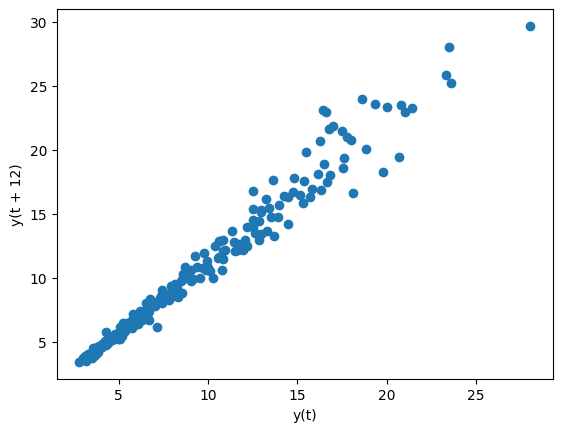

In [29]:
pd.plotting.lag_plot(a10.value, lag=12)

## Zadanie 2

Wczytaj dane `daily-min-temperatures.csv` opisujący minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykres sezonowy, tzn. wykres wartości szeregu z podziałem na miesiące i lata,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [30]:
daily_temp = pd.read_csv('daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
daily_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [31]:
daily_temp.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

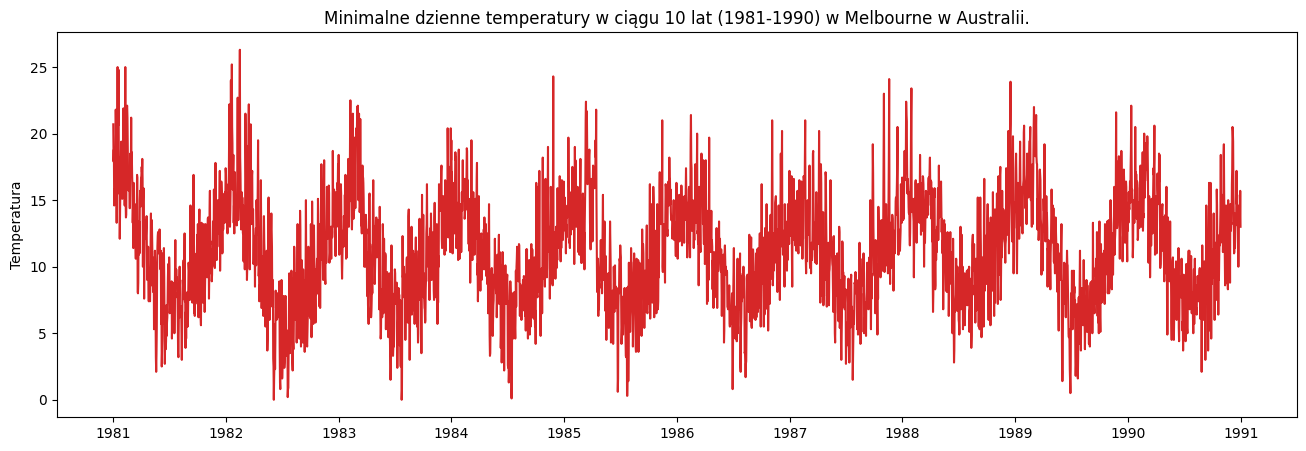

In [32]:
plot_time_series(daily_temp.index, daily_temp.Temp, 
                 title='Minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii.',
                ylabel='Temperatura', xlabel='')
# dane dzienne
# brak trendu
# jest sezonowosc 

In [33]:
groups = daily_temp.Temp.groupby(Grouper(freq='Y'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


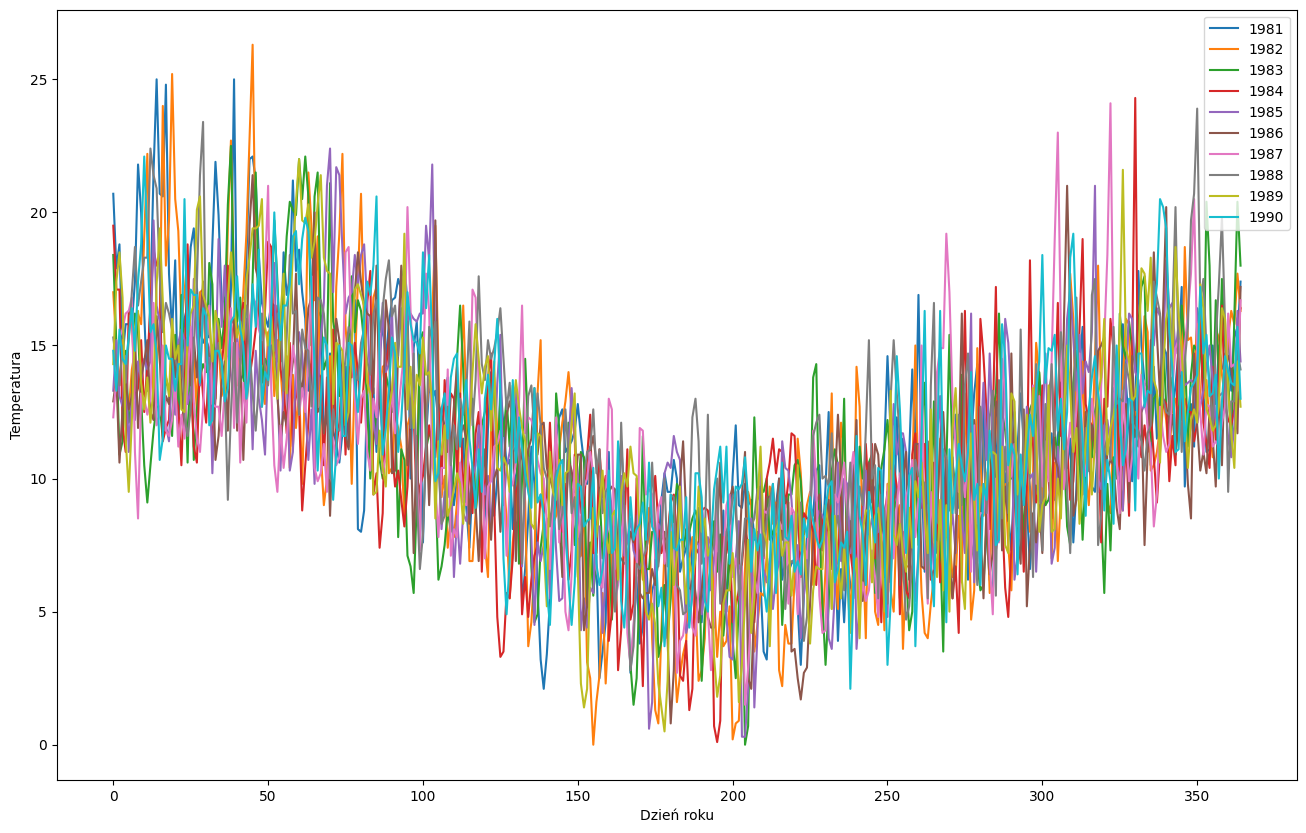

In [34]:
years.plot(subplots=False, legend = True, figsize=(16, 10))
plt.legend(loc='upper right')
plt.gca().set(ylabel='Temperatura', xlabel='Dzień roku')
plt.show()
#widzimy, że nie ma trendu (dla każdego roku to oscyluje w tych samych regionach więc nie ma trendu,
#ale widać też, że dla każdego roku dane oscylują w podobny sposób, jest sezonowość)

In [35]:
daily_temp['year'] = [d.year for d in daily_temp.index]
daily_temp['month'] = [d.strftime('%b') for d in daily_temp.index]

daily_temp.head()

,Temp,year,month
Date,,,
1981-01-01,20.7,1981,Jan
1981-01-02,17.9,1981,Jan
1981-01-03,18.8,1981,Jan
1981-01-04,14.6,1981,Jan
1981-01-05,15.8,1981,Jan


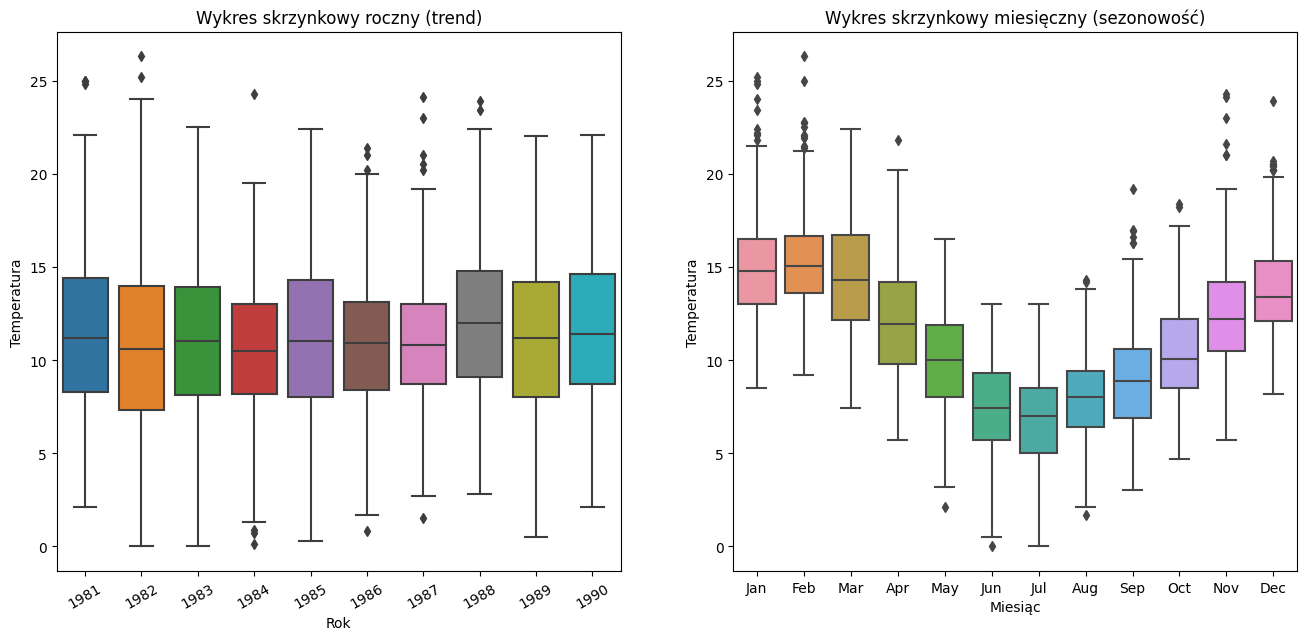

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='year', y='Temp', data=daily_temp, ax=axes[0]).set(
    xlabel='Rok',
    ylabel='Temperatura'
)

sns.boxplot(x='month', y='Temp', data=daily_temp, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Temperatura'
)

axes[0].set_title('Wykres skrzynkowy roczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')
plt.show()
#wykres zmian w latach - brak trendu i wykres zmian w poszczególnych miesiącach - wskazuje na sezonowość

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

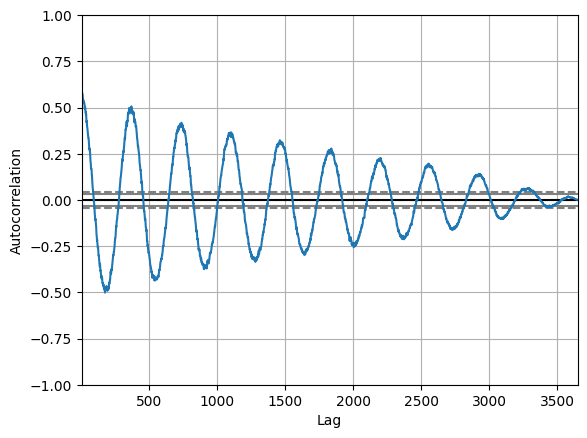

In [37]:
autocorrelation_plot(daily_temp.Temp.tolist())
#autokorelacja, wykres ewidentnie wskazuje na brak stacjonarności i na sezonowość

<Axes: xlabel='y(t)', ylabel='y(t + 182)'>

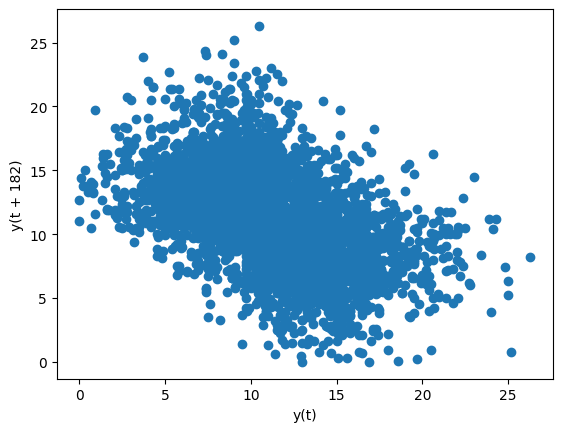

In [38]:
pd.plotting.lag_plot(daily_temp.Temp, lag=int(365/2)) #jest pewna zależność

## Zadanie 3

Wczytaj dane `daily-total-female-births.csv` przedstawiający całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.


In [39]:
daily_birth = pd.read_csv('daily-total-female-births.csv', 
                 parse_dates=['Date'], index_col='Date')

daily_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


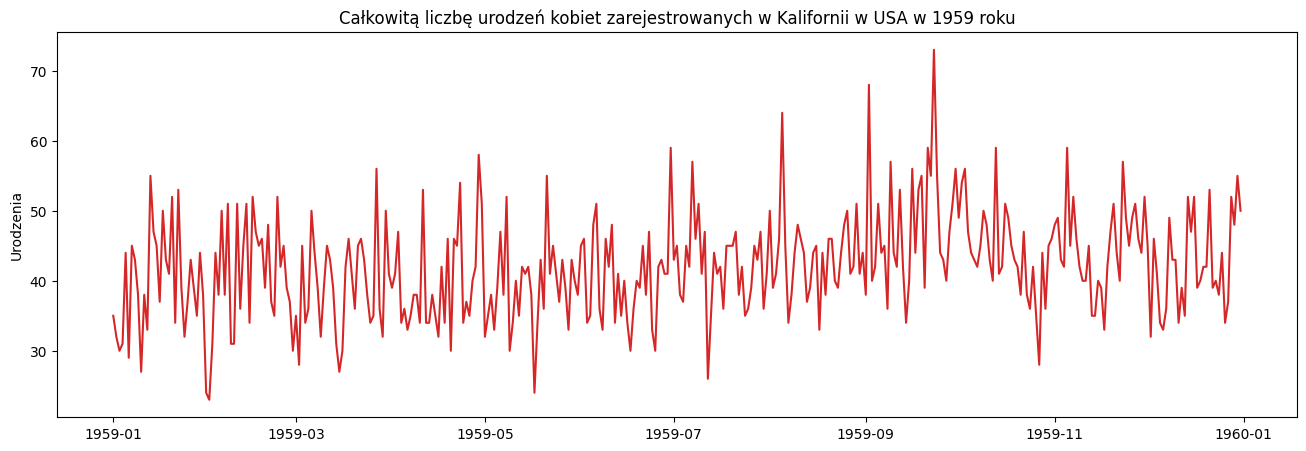

In [40]:
plot_time_series(daily_birth.index, daily_birth.Births, 
                 title='Całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku',
                ylabel='Urodzenia', xlabel='')
#brak sezonowości i trendu

In [41]:
daily_birth['year'] = [d.year for d in daily_birth.index]
daily_birth['month'] = [d.strftime('%b') for d in daily_birth.index]
daily_birth['day'] = [d.strftime('%d') for d in daily_birth.index]

daily_birth.head()


,Births,year,month,day
Date,,,,
1959-01-01,35,1959,Jan,01
1959-01-02,32,1959,Jan,02
1959-01-03,30,1959,Jan,03
1959-01-04,31,1959,Jan,04
1959-01-05,44,1959,Jan,05


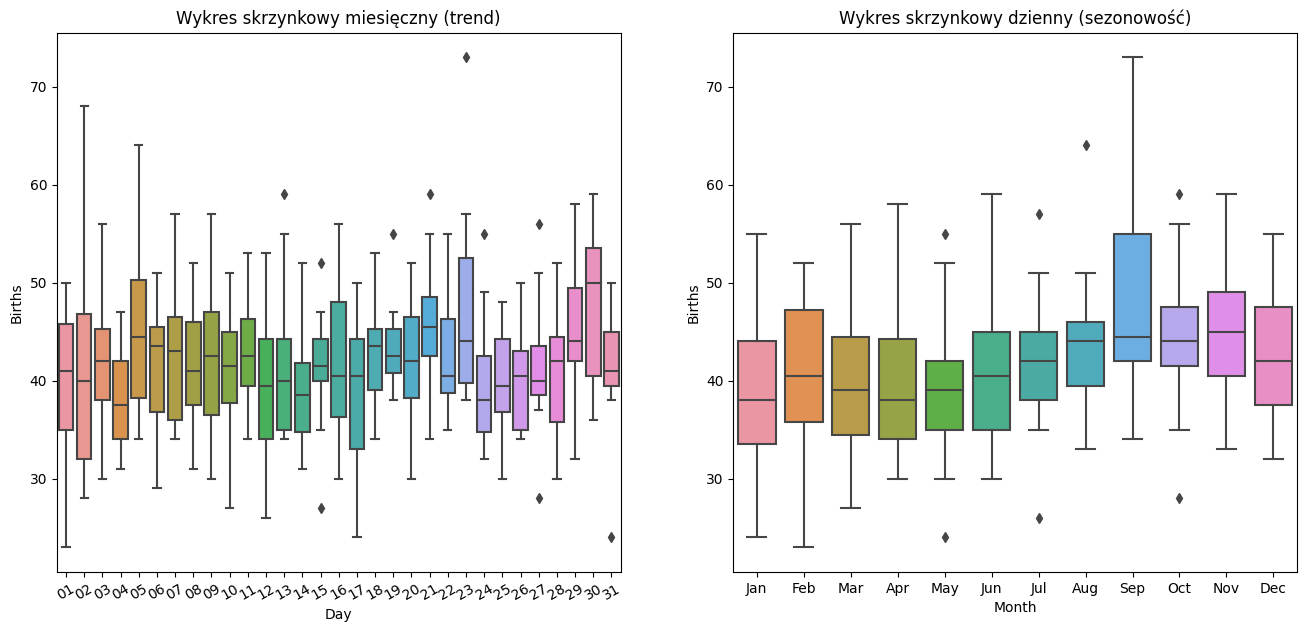

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='month', y='Births', data=daily_birth, ax=axes[1]).set(
    xlabel='Month',
    ylabel='Births'
)


sns.boxplot(x='day', y='Births', data=daily_birth, ax=axes[0]).set(
    xlabel='Day',
    ylabel='Births'
)

axes[0].set_title('Wykres skrzynkowy miesięczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy dzienny (sezonowość)')
plt.show()
#wykresy skrzynkowe, pierwszy wskazuje na brak trendu, z drugiego raczej nie widzimy sezonowości

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

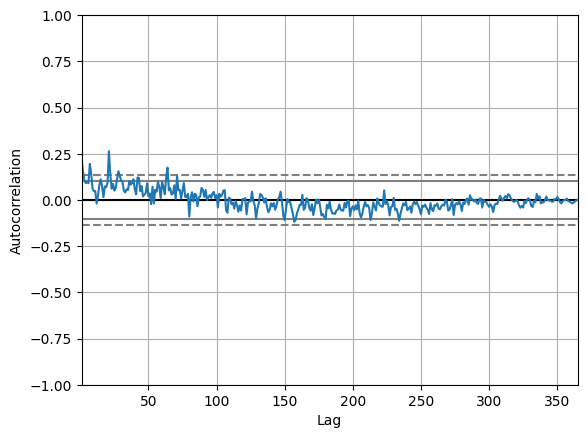

In [43]:
autocorrelation_plot(daily_birth.Births.tolist())

#ewidentnie staconarny

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

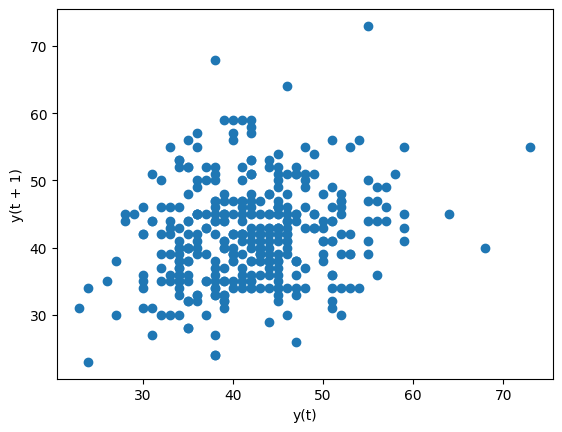

In [44]:
pd.plotting.lag_plot(daily_birth.Births) #bardzo delikatna zależność